# Model selection throuh Optuna


In [ ]:
import numpy as np
import pandas as pd
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore")

# importlib.reload(data_clean_script)     # reload

In [ ]:
# !pip install optuna
# !pip install xgboost
# !pip install lightgbm
# !pip install mlflow
# !pip install dagshub

import mlflow
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 261.0/261.0 kB 6.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139.9/139.9 kB 11.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.7/13.7 MB 72.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.2/85.2 kB 6.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 74.3/74.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
import dagshub

dagshub.init(repo_owner="rabin20-04", repo_name="delivery_time_prediction", mlflow=True)

‚ùó‚ùó‚ùó AUTHORIZATION REQUIRED ‚ùó‚ùó‚ùó

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=d28c5483-9878-4af8-b63f-e79992c3e408&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=157b9adc739b9d20021131529be539765948624661976d55b460a52bb144d77e




Accessing as rabin20-04

Initialized MLflow to track repo "rabin20-04/delivery_time_prediction"

Repository rabin20-04/delivery_time_prediction initialized!

In [7]:
from sklearn import set_config

set_config(transform_output="pandas")

#### Data


In [11]:
original_df = pd.read_csv("../data/raw/train.csv")

import sys
import importlib

sys.path.append("../data/files_/")
import data_clean_script

# importlib.reload(data_clean_script)

In [13]:
df = data_clean_script.perform_data_cleaning(original_df)

In [ ]:
df.sample(6)

age  ratings     weather traffic  vehicle_condition type_of_order  \
21249  20.0      4.3      stormy     low                  0         snack   
21441  36.0      4.7  sandstorms     jam                  1        buffet   
15461  27.0      4.9      stormy     low                  2        buffet   
19674  31.0      4.8      cloudy  medium                  1        buffet   
5239   29.0      4.8         fog     jam                  1          meal   
38608  31.0      4.6         fog  medium                  2        drinks   

      type_of_vehicle  multiple_deliveries festival      city_type  \
21249      motorcycle                  1.0       no  metropolitian   
21441      motorcycle                  1.0       no          urban   
15461         scooter                  1.0       no  metropolitian   
19674      motorcycle                  1.0       no          urban   
5239       motorcycle                  2.0       no  metropolitian   
38608      motorcycle                  1.0       no          urban   

       time_taken  is_weekend  pickup_time_minutes order_time_of_day  \
21249          20           1                 15.0           morning   
21441          28           0                 15.0           evening   
15461          16           0                 10.0             night   
19674          36           0                  5.0         afternoon   
5239           43           1                  5.0             night   
38608          19           1                 10.0         afternoon   

        distance distance_type  
21249   1.488329         short  
21441  13.970652          long  
15461  10.866716          long  
19674  10.565936          long  
5239   20.178299     very_long  
38608   6.209976        medium

In [ ]:
df.columns.tolist()

['age',
 'ratings',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'time_taken',
 'is_weekend',
 'pickup_time_minutes',
 'order_time_of_day',
 'distance',
 'distance_type']

In [ ]:
# df.drop(
#     columns={"city_name", "order_day_of_week", "order_month"}, axis=1, inplace=True
# )  # contains just two months data -- may lead to overfit

In [ ]:
df.shape

(45502, 16)

In [ ]:
df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [23]:
num_cols = ["age", "ratings", "pickup_time_minutes", "distance"]
# continuous | categorical | nominal

nominal_cat_cols = [
    "weather",
    "type_of_order",
    "type_of_vehicle",
    "festival",
    "city_type",
    "order_time_of_day",
    "is_weekend",
]
ordinal_cat_cols = ["traffic", "distance_type"]
traffic_order = ["low", "medium", "high", "jam"]
distance_order = ["short", "medium", "long", "very_long"]

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
mlflow.set_tracking_uri(
    "https://dagshub.com/rabin20-04/delivery_time_prediction.mlflow"
)

In [ ]:
mlflow.set_experiment("EXP-4  Best Model selction - Optuna -colab ")

2025/06/30 13:49:27 INFO mlflow.tracking.fluent: Experiment with name 'EXP-4  Best Model selction - Optuna ' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/86c6ed12efbd42a98e3524eea46fe207', creation_time=1751270667734, experiment_id='2', last_update_time=1751270667734, lifecycle_stage='active', name='EXP-4  Best Model selction - Optuna ', tags={}>

# Drop missing


<Axes: >

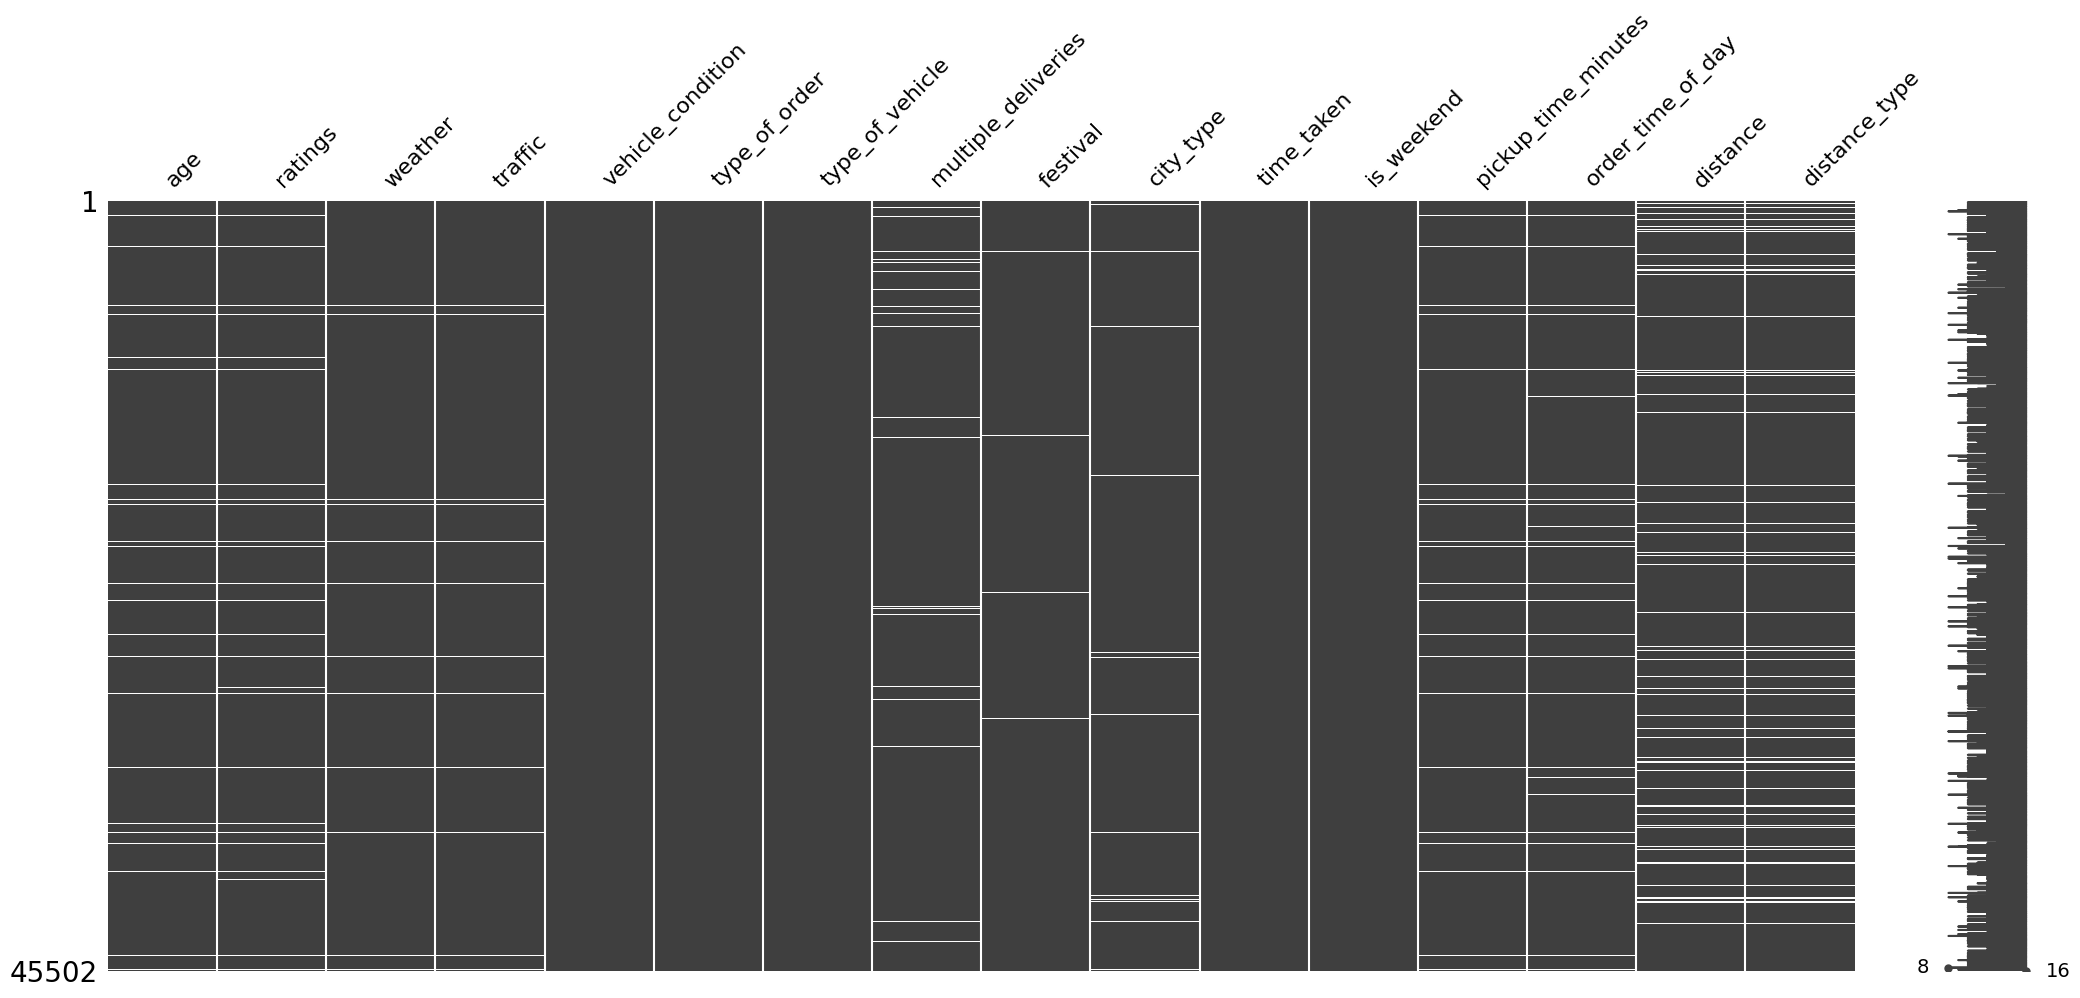

In [ ]:
msno.matrix(df)

In [ ]:
# Mnar

In [ ]:
import mlflow

In [ ]:
temp_df = df.copy().dropna()
# temp_df = pd.read_csv("/content/null_droped.csv")
temp_df.drop(columns="Unnamed: 0", axis=1, inplace=True)

temp_df.shape

(37695, 16)

In [49]:
X = temp_df.drop(columns="time_taken", axis=1)
y = temp_df["time_taken"]

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape,

((30156, 15), (7539, 15), (30156,), (7539,))

In [52]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30156 entries, 7204 to 15795
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  30156 non-null  float64
 1   ratings              30156 non-null  float64
 2   weather              30156 non-null  object 
 3   traffic              30156 non-null  object 
 4   vehicle_condition    30156 non-null  int64  
 5   type_of_order        30156 non-null  object 
 6   type_of_vehicle      30156 non-null  object 
 7   multiple_deliveries  30156 non-null  float64
 8   festival             30156 non-null  object 
 9   city_type            30156 non-null  object 
 10  is_weekend           30156 non-null  int64  
 11  pickup_time_minutes  30156 non-null  float64
 12  order_time_of_day    30156 non-null  object 
 13  distance             30156 non-null  float64
 14  distance_type        30156 non-null  object 
dtypes: float64(5), int64(2), object(8)
mem

## Preprocessing


In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", MinMaxScaler(), num_cols),
        (
            "nominal_encode",
            OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False),
            nominal_cat_cols,
        ),
        (
            "ordinal_encode",
            OrdinalEncoder(categories=[traffic_order, distance_order]),
            ordinal_cat_cols,
        ),
    ],
    remainder="passthrough",
    n_jobs=3,
    verbose_feature_names_out=False,
)
preprocessor.set_output(transform="pandas")

ColumnTransformer(n_jobs=3, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'order_time_of_day',
                                  'is_weekend']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [54]:
temp_df

age  ratings     weather traffic  vehicle_condition type_of_order  \
0      37.0      4.9       sunny    high                  2         snack   
1      34.0      4.5      stormy     jam                  2         snack   
2      23.0      4.4  sandstorms     low                  0        drinks   
3      38.0      4.7       sunny  medium                  0        buffet   
4      32.0      4.6      cloudy    high                  1         snack   
...     ...      ...         ...     ...                ...           ...   
37690  35.0      4.2       windy     jam                  2        drinks   
37691  30.0      4.8       windy    high                  1          meal   
37692  30.0      4.9      cloudy     low                  1        drinks   
37693  20.0      4.7      cloudy    high                  0         snack   
37694  23.0      4.9         fog  medium                  2         snack   

      type_of_vehicle  multiple_deliveries festival      city_type  \
0          motorcycle                  0.0       no          urban   
1             scooter                  1.0       no  metropolitian   
2          motorcycle                  1.0       no          urban   
3          motorcycle                  1.0       no  metropolitian   
4             scooter                  1.0       no  metropolitian   
...               ...                  ...      ...            ...   
37690      motorcycle                  1.0       no  metropolitian   
37691      motorcycle                  0.0       no  metropolitian   
37692         scooter                  0.0       no  metropolitian   
37693      motorcycle                  1.0       no  metropolitian   
37694         scooter                  1.0       no  metropolitian   

       time_taken  is_weekend  pickup_time_minutes order_time_of_day  \
0              24           1                 15.0           morning   
1              33           0                  5.0           evening   
2              26           1                 15.0           morning   
3              21           0                 10.0           evening   
4              30           1                 15.0         afternoon   
...           ...         ...                  ...               ...   
37690          33           0                 10.0             night   
37691          32           0                 10.0           morning   
37692          16           0                 15.0             night   
37693          26           0                  5.0         afternoon   
37694          36           0                  5.0         afternoon   

        distance distance_type  
0       3.025149         short  
1      20.183530     very_long  
2       1.552758         short  
3       7.790401        medium  
4       6.210138        medium  
...          ...           ...  
37690  16.600272     very_long  
37691   1.489846         short  
37692   4.657195         short  
37693   6.232393        medium  
37694  12.074396          long  

[37695 rows x 16 columns]

In [55]:
temp_df.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'is_weekend', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [56]:
temp_df.shape

(37695, 16)

In [57]:
X_train_trans = preprocessor.fit_transform(xtrain)
X_test_trans = preprocessor.transform(xtest)
pt = PowerTransformer()
y_train_pt = pt.fit_transform(ytrain.values.reshape(-1, 1))
y_test_pt = pt.transform(ytest.values.reshape(-1, 1))

In [58]:
X_test_trans.head()

age  ratings  pickup_time_minutes  distance  weather_fog  \
37469  0.157895     0.84                  1.0  0.239096          1.0   
33249  0.526316     0.80                  0.5  0.476360          0.0   
19970  0.368421     0.68                  0.5  0.545261          0.0   
4405   0.789474     0.96                  0.5  0.484974          1.0   
24929  0.157895     0.96                  0.5  0.623770          0.0   

       weather_sandstorms  weather_stormy  weather_sunny  weather_windy  \
37469                 0.0             0.0            0.0            0.0   
33249                 1.0             0.0            0.0            0.0   
19970                 1.0             0.0            0.0            0.0   
4405                  0.0             0.0            0.0            0.0   
24929                 1.0             0.0            0.0            0.0   

       type_of_order_drinks  ...  city_type_semi-urban  city_type_urban  \
37469                   0.0  ...                   0.0              0.0   
33249                   0.0  ...                   0.0              0.0   
19970                   0.0  ...                   0.0              0.0   
4405                    0.0  ...                   0.0              0.0   
24929                   0.0  ...                   0.0              0.0   

       order_time_of_day_evening  order_time_of_day_morning  \
37469                        0.0                        1.0   
33249                        1.0                        0.0   
19970                        1.0                        0.0   
4405                         1.0                        0.0   
24929                        0.0                        0.0   

       order_time_of_day_night  is_weekend_1  traffic  distance_type  \
37469                      0.0           0.0      2.0            1.0   
33249                      0.0           0.0      3.0            2.0   
19970                      0.0           1.0      1.0            2.0   
4405                       0.0           0.0      1.0            2.0   
24929                      0.0           1.0      1.0            2.0   

       vehicle_condition  multiple_deliveries  
37469                  0                  0.0  
33249                  2                  1.0  
19970                  0                  1.0  
4405                   0                  1.0  
24929                  0                  1.0  

[5 rows x 25 columns]

In [59]:
X_train_trans.shape

(30156, 25)

<Axes: >

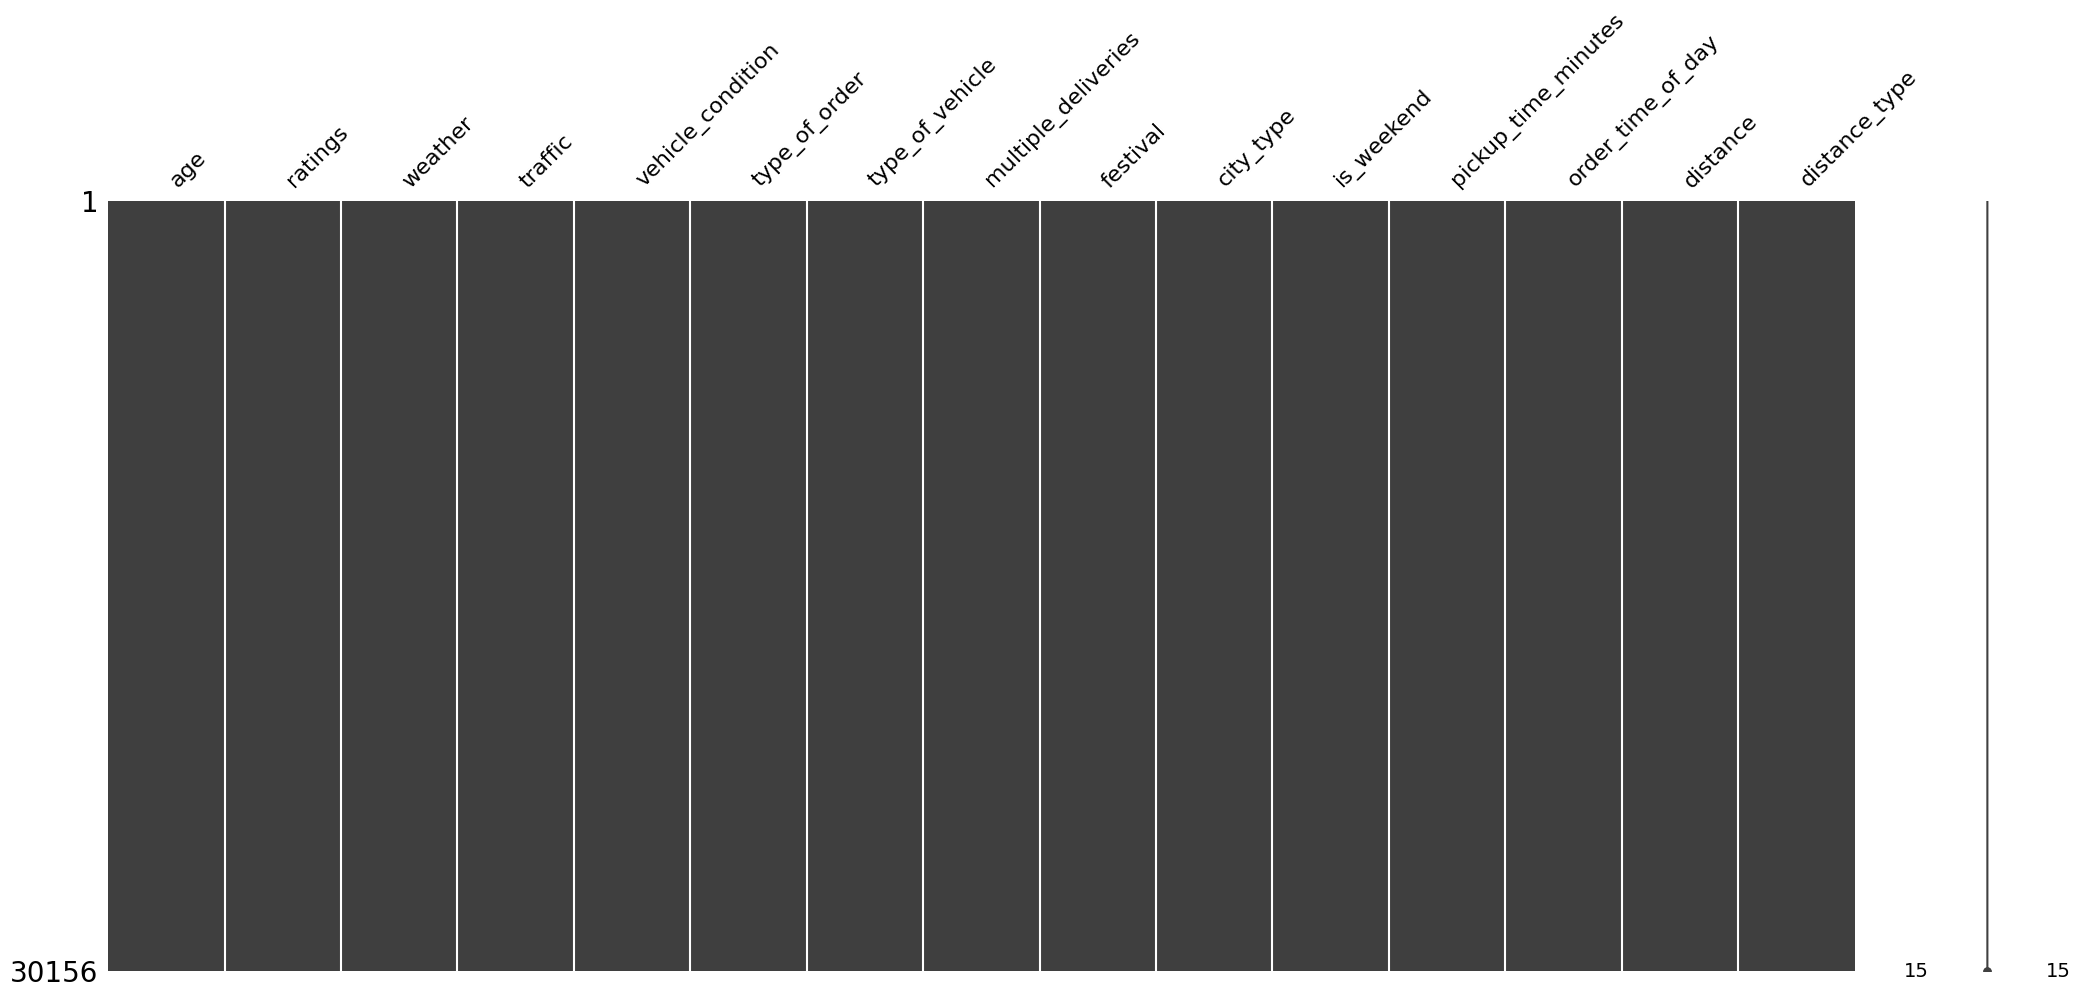

In [60]:
msno.matrix(xtrain)

## Optuna


In [61]:
def objective(trial):
    with mlflow.start_run(nested=True):
        model_name = trial.suggest_categorical(
            "model", ["SVM", "RF", "KNN", "GB", "XGB", "LGBM"]
        )

        if model_name == "SVM":
            kernel_svm = trial.suggest_categorical(
                "kernel_svm", ["linear", "poly", "rbf"]
            )
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear", 0, 10)
                model = SVR(C=c_linear, kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly", 0, 10)
                degree_poly = trial.suggest_int("degree_poly", 1, 5)
                model = SVR(C=c_poly, degree=degree_poly, kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf", 0, 100)
                gamma_rbf = trial.suggest_float("gamma_rbf", 0, 10)
                model = SVR(C=c_rbf, gamma=gamma_rbf, kernel="rbf")

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf", 10, 200)
            max_depth_rf = trial.suggest_int("max_depth_rf", 2, 20)
            model = RandomForestRegressor(
                n_estimators=n_estimators_rf,
                max_depth=max_depth_rf,
                random_state=42,
                n_jobs=-1,
            )

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb", 10, 200)
            learning_rate_gb = trial.suggest_float("learning_rate_gb", 0, 1)
            max_depth_gb = trial.suggest_int("max_depth_gb", 2, 20)
            model = GradientBoostingRegressor(
                n_estimators=n_estimators_gb,
                learning_rate=learning_rate_gb,
                max_depth=max_depth_gb,
                random_state=42,
            )

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn", 1, 25)
            weights_knn = trial.suggest_categorical(
                "weights_knn", ["uniform", "distance"]
            )
            model = KNeighborsRegressor(
                n_neighbors=n_neighbors_knn, weights=weights_knn, n_jobs=-1
            )

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb", 10, 200)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb", 0.1, 0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb", 2, 20)
            model = XGBRegressor(
                n_estimators=n_estimators_xgb,
                learning_rate=learning_rate_xgb,
                max_depth=max_depth_xgb,
                random_state=42,
                n_jobs=-1,
            )

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm", 10, 200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm", 0.1, 0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm", 2, 20)
            model = LGBMRegressor(
                n_estimators=n_estimators_lgbm,
                learning_rate=learning_rate_lgbm,
                max_depth=max_depth_lgbm,
                random_state=42,
            )

        model.fit(X_train_trans, y_train_pt.values.ravel())

        mlflow.log_params(model.get_params())

        y_pred_train = model.predict(X_train_trans)
        y_pred_test = model.predict(X_test_trans)

        y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1, 1))
        y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))

        error = mean_absolute_error(ytest, y_pred_test_org)

        mlflow.log_param("model", model_name)

        mlflow.log_metric("MAE", error)

        return error

In [62]:
study = optuna.create_study(direction="minimize", study_name="model_selection")

with mlflow.start_run(run_name="Best Model") as parent:

    study.optimize(objective, n_trials=30, n_jobs=-1, show_progress_bar=True)

    mlflow.log_params(study.best_params)

    mlflow.log_metric("best_score", study.best_value)

[I 2025-06-30 08:58:34,180] A new study created in memory with name: model_selection


  0%|          | 0/30 [00:00<?, ?it/s]

üèÉ View run bedecked-perch-118 at: https://dagshub.com/rabin20-04/delivery_time_prediction.mlflow/#/experiments/0/runs/5782104eecf64843a65469f804a1c619
üß™ View experiment at: https://dagshub.com/rabin20-04/delivery_time_prediction.mlflow/#/experiments/0
[I 2025-06-30 08:58:38,654] Trial 1 finished with value: 3.065381647375074 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 80, 'learning_rate_lgbm': 0.21662030547075034, 'max_depth_lgbm': 16}. Best is trial 1 with value: 3.065381647375074.
üèÉ View run skillful-sponge-311 at: https://dagshub.com/rabin20-04/delivery_time_prediction.mlflow/#/experiments/0/runs/a6953caec68b4459ac874d5f08c35b11
üß™ View experiment at: https://dagshub.com/rabin20-04/delivery_time_prediction.mlflow/#/experiments/0
[I 2025-06-30 08:58:43,985] Trial 0 finished with value: 4.662582357013858 and parameters: {'model': 'RF', 'n_estimators_rf': 155, 'max_depth_rf': 4}. Best is trial 1 with value: 3.065381647375074.
üèÉ View run ambitious-loon-743 at: h

In [ ]:
study.best_params


# {'model': 'LGBM',
#  'n_estimators_lgbm': 146,
#  'learning_rate_lgbm': 0.11236909502880069,
#  'max_depth_lgbm': 10}
# {'model': 'GB',
#  'n_estimators_gb': 121,
#  'learning_rate_gb': 0.0510257391863774,
#  'max_depth_gb': 9}

{'model': 'LGBM',
 'n_estimators_lgbm': 114,
 'learning_rate_lgbm': 0.19232864336594527,
 'max_depth_lgbm': 9}

In [66]:
# train the model on best parameters

lgbm_params = study.best_params
lgbm = LGBMRegressor(**lgbm_params)

lgbm.fit(X_train_trans, y_train_pt.values.ravel())

[LightGBM] [Warning] Unknown parameter: n_estimators_lgbm
[LightGBM] [Warning] Unknown parameter: max_depth_lgbm
[LightGBM] [Warning] Unknown parameter: model
[LightGBM] [Warning] Unknown parameter: learning_rate_lgbm
[LightGBM] [Warning] Unknown parameter: n_estimators_lgbm
[LightGBM] [Warning] Unknown parameter: max_depth_lgbm
[LightGBM] [Warning] Unknown parameter: model
[LightGBM] [Warning] Unknown parameter: learning_rate_lgbm
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 30156, number of used features: 25
[LightGBM] [Info] Start training from score -0.000000


LGBMRegressor(learning_rate_lgbm=0.19232864336594527, max_depth_lgbm=9,
              model='LGBM', n_estimators_lgbm=114)

In [ ]:
y_pred_train = lgbm.predict(X_train_trans)
y_pred_test = lgbm.predict(X_test_trans)

[LightGBM] [Warning] Unknown parameter: n_estimators_lgbm
[LightGBM] [Warning] Unknown parameter: max_depth_lgbm
[LightGBM] [Warning] Unknown parameter: model
[LightGBM] [Warning] Unknown parameter: learning_rate_lgbm
[LightGBM] [Warning] Unknown parameter: n_estimators_lgbm
[LightGBM] [Warning] Unknown parameter: max_depth_lgbm
[LightGBM] [Warning] Unknown parameter: model
[LightGBM] [Warning] Unknown parameter: learning_rate_lgbm


In [ ]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1, 1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))

In [69]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(ytrain,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(ytest,y_pred_test_org):.2f} minutes")

The train error is 2.97 minutes
The test error is 3.05 minutes


In [70]:
print(f"The train r2 score is {r2_score(ytrain,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(ytest,y_pred_test_org):.2f}")

The train r2 score is 0.85
The test r2 score is 0.83


In [ ]:
study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0        0  4.662582 2025-06-30 08:58:34.486320 2025-06-30 08:58:43.985459   
1        1  3.065382 2025-06-30 08:58:34.497364 2025-06-30 08:58:38.654524   
2        2  3.738238 2025-06-30 08:58:38.662512 2025-06-30 09:09:29.633534   
3        3  4.157666 2025-06-30 08:58:44.003751 2025-06-30 08:59:05.854320   
4        4  3.381438 2025-06-30 08:59:05.867256 2025-06-30 08:59:45.848821   
5        5  4.675475 2025-06-30 08:59:45.866099 2025-06-30 09:10:10.341367   
6        6  4.663587 2025-06-30 09:09:29.647551 2025-06-30 09:09:40.280681   
7        7  3.072353 2025-06-30 09:09:40.291576 2025-06-30 09:10:07.542758   
8        8  4.220218 2025-06-30 09:10:07.554548 2025-06-30 09:10:20.492462   
9        9  4.248874 2025-06-30 09:10:10.358625 2025-06-30 09:10:36.169504   
10      10  3.047641 2025-06-30 09:10:20.498407 2025-06-30 09:10:25.222786   
11      11  3.839842 2025-06-30 09:10:25.227256 2025-06-30 09:10:41.186054   
12      12  3.052732 2025-06-30 09:10:36.173921 2025-06-30 09:10:52.189932   
13      13  3.040142 2025-06-30 09:10:41.191209 2025-06-30 09:10:57.169042   
14      14  3.064731 2025-06-30 09:10:52.194479 2025-06-30 09:11:08.163262   
15      15  3.146915 2025-06-30 09:10:57.174388 2025-06-30 09:11:13.190523   
16      16  3.114089 2025-06-30 09:11:08.167768 2025-06-30 09:11:20.162114   
17      17  4.920327 2025-06-30 09:11:13.195581 2025-06-30 09:11:34.262121   
18      18  5.444879 2025-06-30 09:11:20.174864 2025-06-30 09:11:35.170292   
19      19  3.119094 2025-06-30 09:11:34.267374 2025-06-30 09:11:50.184711   
20      20  3.136526 2025-06-30 09:11:35.174992 2025-06-30 09:11:51.252826   
21      21  3.051998 2025-06-30 09:11:50.189962 2025-06-30 09:12:06.170228   
22      22  3.067905 2025-06-30 09:11:51.259905 2025-06-30 09:12:07.176444   
23      23  3.033306 2025-06-30 09:12:06.174576 2025-06-30 09:12:22.177442   
24      24  3.031953 2025-06-30 09:12:07.182381 2025-06-30 09:12:23.200050   
25      25  5.313172 2025-06-30 09:12:22.183336 2025-06-30 09:12:39.876796   
26      26  5.313172 2025-06-30 09:12:23.209286 2025-06-30 09:12:40.970799   
27      27  6.138782 2025-06-30 09:12:39.881555 2025-06-30 09:21:00.738250   
28      28  3.109980 2025-06-30 09:12:40.986545 2025-06-30 09:12:59.645340   
29      29  3.631270 2025-06-30 09:12:59.662037 2025-06-30 09:13:49.191906   

                 duration  params_c_linear  params_c_poly  params_c_rbf  \
0  0 days 00:00:09.499139              NaN            NaN           NaN   
1  0 days 00:00:04.157160              NaN            NaN           NaN   
2  0 days 00:10:50.971022              NaN       5.092404           NaN   
3  0 days 00:00:21.850569              NaN            NaN           NaN   
4  0 days 00:00:39.981565              NaN            NaN           NaN   
5  0 days 00:10:24.475268         5.472316            NaN           NaN   
6  0 days 00:00:10.633130              NaN            NaN           NaN   
7  0 days 00:00:27.251182              NaN            NaN           NaN   
8  0 days 00:00:12.937914              NaN            NaN           NaN   
9  0 days 00:00:25.810879              NaN            NaN           NaN   
10 0 days 00:00:04.724379              NaN            NaN           NaN   
11 0 days 00:00:15.958798              NaN            NaN           NaN   
12 0 days 00:00:16.016011              NaN            NaN           NaN   
13 0 days 00:00:15.977833              NaN            NaN           NaN   
14 0 days 00:00:15.968783              NaN            NaN           NaN   
15 0 days 00:00:16.016135              NaN            NaN           NaN   
16 0 days 00:00:11.994346              NaN            NaN           NaN   
17 0 days 00:00:21.066540              NaN            NaN           NaN   
18 0 days 00:00:14.995428              NaN            NaN           NaN   
19 0 days 00:00:15.917337              NaN            NaN           NaN   
20 0 days 

In [ ]:
# model frequency

study.trials_dataframe()["params_model"].value_counts()

params_model
LGBM    14
KNN      4
RF       3
SVM      3
GB       3
XGB      3
Name: count, dtype: int64

In [ ]:
# avg scores for all tested models

study.trials_dataframe().groupby("params_model")["value"].mean().sort_values()

params_model
LGBM    3.129447
XGB     3.978766
RF      4.132841
GB      4.236421
KNN     4.773859
SVM     4.850832
Name: value, dtype: float64

In [74]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor=lgbm, transformer=pt)

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model, X_train_trans, ytrain, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1
)

scores

array([-3.08875699, -3.07222064, -3.07556268, -3.09114835, -3.04729934])

In [ ]:
-scores.mean()

np.float64(3.0749976000159767)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study, params=["model"])